## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2020-21 учебный год

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [286]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [306]:
# your code here
data = pd.read_csv("/Users/katyona/Desktop/University/proga/iad/notebooks/german_credit.csv")
data.head(5)  # первые 5 строк

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [307]:
data.tail(5)  # последние 5 строк

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


In [308]:
print('\nSize:', data.shape)  # размер
# 1000 строк, 21 столбец (не считая индексов)


Size: (1000, 21)


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [309]:
# your code here
print('Есть ли пропуски:', data.isnull().any().any())
print('То есть пропущенных значений нет')

Есть ли пропуски: False
То есть пропущенных значений нет


In [310]:
# категориальные
cat_features = ['credit_history', 'purpose', 'personal_status_sex', 'other_debtors', 'property', 
                'other_installment_plans', 'housing']
# бинарные
bin_features = ['telephone', 'foreign_worker', 'credit_risk']

# порядковые
ord_features = ['status', 'savings', 'employment_duration', 'installment_rate', 'present_residence', 
                'number_credits','people_liable', 'job']

# количесвенные
real_features = ['duration', 'amount', 'age']

print('Категориальные (неупорядоченное множество значений):')
for el in cat_features:
    print(el)
print('\nБинарные (можно заменить на два значения - 0 и 1):')
for el in bin_features:
    print(el)
print('\nПорядковые (конечное упорядоченное множество):')
for el in ord_features:
    print(el)
print('\nКоличественные (значения - вся числовая ось):')
for el in real_features:
    print(el)


Категориальные (неупорядоченное множество значений):
credit_history
purpose
personal_status_sex
other_debtors
property
other_installment_plans
housing

Бинарные (можно заменить на два значения - 0 и 1):
telephone
foreign_worker
credit_risk

Порядковые (конечное упорядоченное множество):
status
savings
employment_duration
installment_rate
present_residence
number_credits
people_liable
job

Количественные (значения - вся числовая ось):
duration
amount
age


### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [311]:
# your code here
data.groupby('purpose')[['amount']].mean()

,amount
purpose,
business,8209.333333
car (new),5370.223301
car (used),3066.983425
domestic appliances,2728.090909
furniture/equipment,2487.685714
others,3062.948718
radio/television,1498.000000
repairs,3180.400000
retraining,4158.041237


### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [312]:
# your code here
print('Процент клиентов моложе 30 лет, которые снимают жилье:')
print(str(data[(data['age'] < 30) & (data['housing'] == 'rent')].shape[0] / data[data['housing'] == 'rent'].shape[0] * 100)[:5] + '%')

print('Процент клиентов старше 40 лет, которые снимают жилье:')
print(str(data[(data['age'] > 40) & (data['housing'] == 'rent')].shape[0] / data[data['housing'] == 'rent'].shape[0] * 100)[:5] + '%')

Процент клиентов моложе 30 лет, которые снимают жилье:
34.45%
Процент клиентов старше 40 лет, которые снимают жилье:
25.91%


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [313]:
# your code here
data[(data['foreign_worker'] == 'yes') & ((data['number_credits'] == '>= 6') | (data['number_credits'] == '4-5'))].shape[0]

1

### Задание 6 (1 балл)

In [314]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

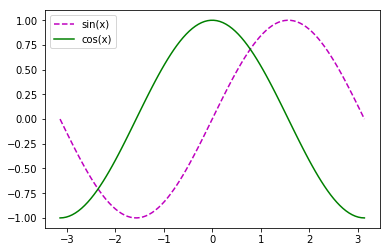

In [315]:
# your code here
xarray = np.linspace(-np.pi, np.pi, num=100)  # все значения аргумента х
ysin = np.sin(xarray)  # все значения функции y = sin(x)
ycos = np.cos(xarray)  # все значения функции y = cos(x)
plt.plot(xarray, ysin, 'm--', label='sin(x)')
plt.plot(xarray, ycos, 'g',label='cos(x)')
plt.legend(loc='upper left') #  наличие подписей

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

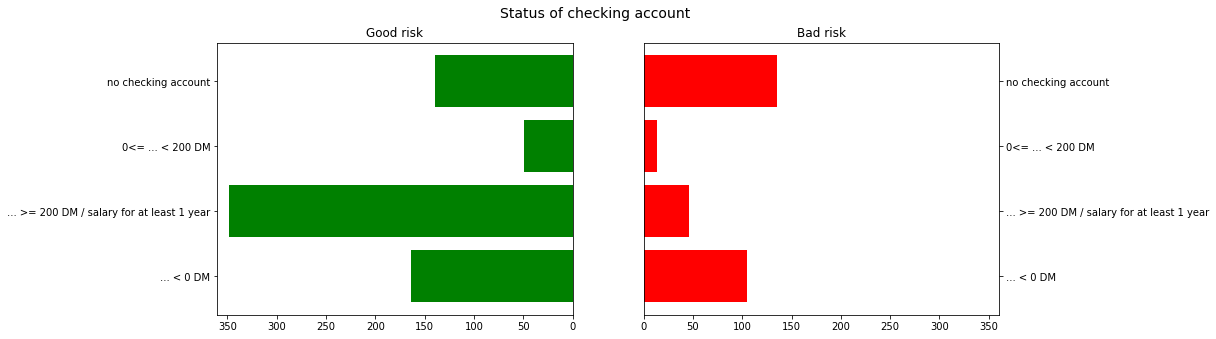

In [316]:
# your code here
good_data = data[data['credit_risk'] == 'good']['status']
bad_data = data[data['credit_risk'] == 'bad']['status']

xg, yg = np.unique(good_data, return_counts=True)
xb, yb = np.unique(bad_data, return_counts=True)

fig, axs = plt.subplots(1, 2, figsize=(14, 5))
axs[0].barh(list(xg), list(yg), color='green')
axs[0].set_xlim((0, 360))
axs[0].invert_xaxis()
axs[0].set_title('Good risk')

axs[1].barh(list(xb), list(yb), color='red')
axs[1].set_xlim((0, 360))
axs[1].set_title('Bad risk')
axs[1].yaxis.tick_right()
fig.suptitle('Status of checking account', fontsize=14)

plt.show()

### Задание 8  (0.5 балла)

In [317]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

'Как с точки зрения написания кода, так и с точки зрения результата мне больше нравится вариант с seaborn. Проще ищется\nи нагляднее показывает результат. Но, может, здесь дело в отображении результата, тк на предыдущем графике другая\nдиаграмма, но этот вариант мне определенно понравился больше.'

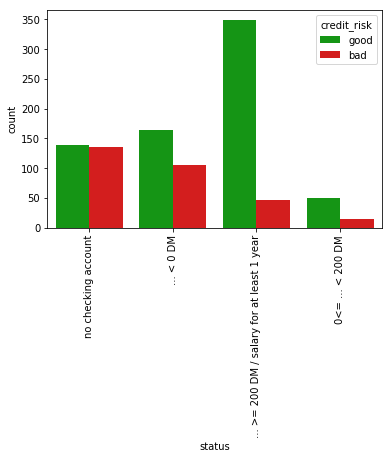

In [318]:
# your code here

g = sns.countplot(x="status", hue="credit_risk", palette=['#00AA00', '#F10000'], data=data)
g.set_xticklabels(g.get_xticklabels(), rotation=90)


'''Как с точки зрения написания кода, так и с точки зрения результата мне больше нравится вариант с seaborn. 
Проще ищется и нагляднее показывает результат. Но, может, здесь дело в отображении результата, тк на предыдущем 
графике другая диаграмма, но этот вариант мне определенно понравился больше.'''

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

/Users/katyona/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


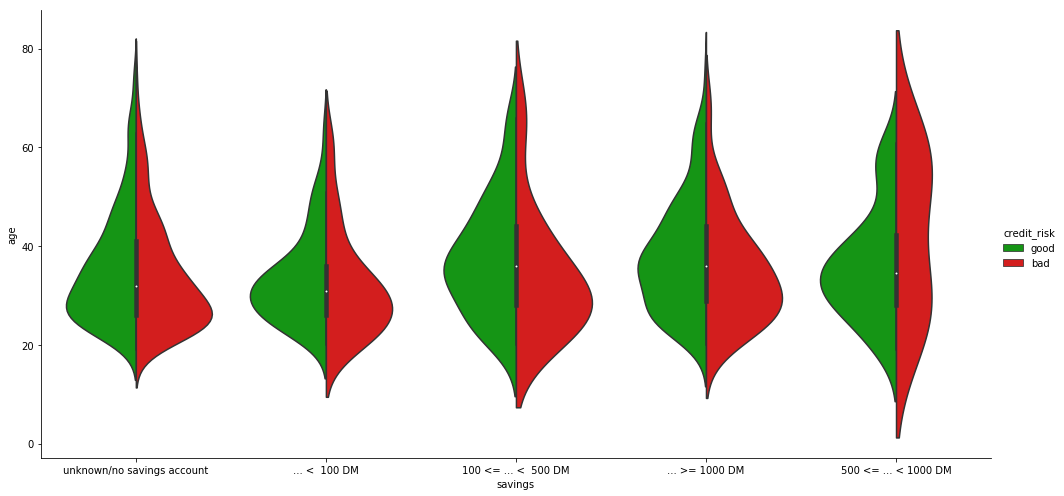

In [319]:
# your code here
fig = sns.catplot(x="savings", y="age", hue="credit_risk", 
                  kind="violin", split=True, palette=['#00AA00', '#F10000'], height=7,
                  aspect=2, data=data)

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

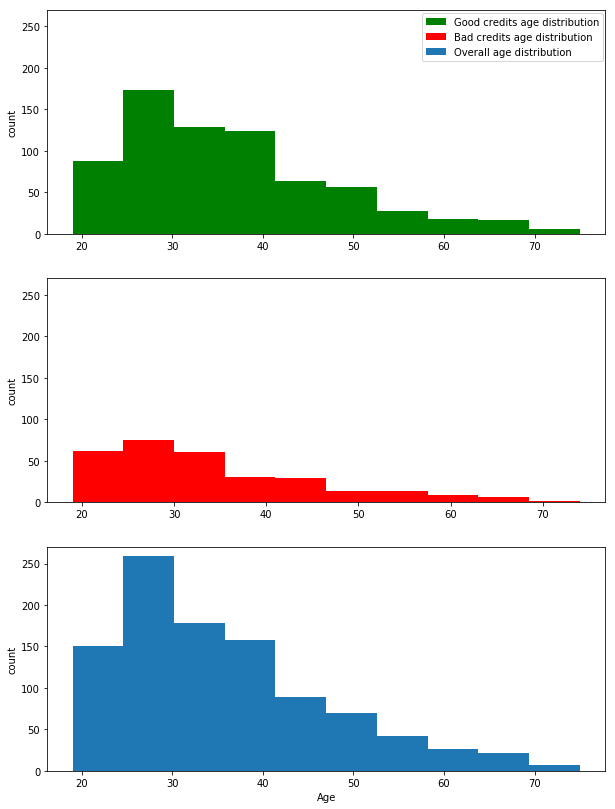

In [320]:
# your code here
fig, axs = plt.subplots(3, 1, figsize=(10, 14))
axs[0].hist(list(data[data['credit_risk']=='good']['age']), color='green', label='Good credits age distribution')
axs[0].set_ylabel('count')
axs[0].set_ylim((0, 270))

axs[1].hist(list(data[data['credit_risk']=='bad']['age']), color='red', label='Bad credits age distribution')
axs[1].set_ylabel('count')
axs[1].set_ylim((0, 270))

axs[2].hist(list(data['age']), label='Overall age distribution')
axs[2].set_ylabel('count')
axs[2].set_xlabel('Age')
axs[2].set_ylim((0, 270))

fig.legend(loc='upper right', bbox_to_anchor=(0.845, 0.795))

plt.show()

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

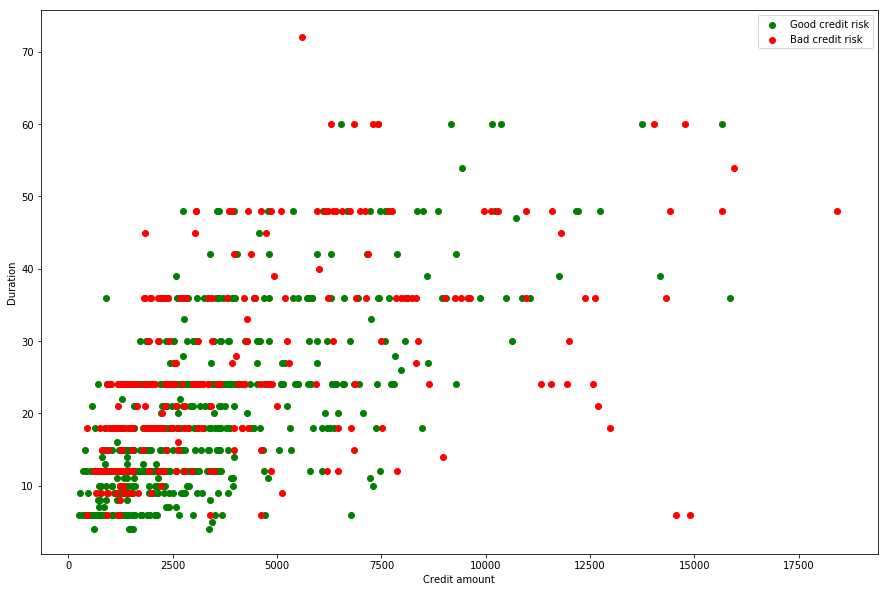

In [321]:
# your code here
fig, ax = plt.subplots(figsize=(15, 10))
good_data = data[data['credit_risk'] == 'good']
bad_data = data[data['credit_risk'] == 'bad']

ax.scatter(x=good_data['amount'], y=good_data['duration'], color='green', label='Good credit risk')
ax.scatter(x=bad_data['amount'], y=bad_data['duration'], color='red', label='Bad credit risk')
plt.xlabel("Credit amount")
plt.ylabel("Duration")

ax.legend()

plt.show()

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

Text(0.5,0,'Age')

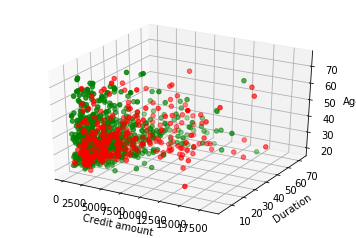

In [322]:
# your code here
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(xs=good_data['amount'], ys=good_data['duration'], zs=good_data['age'], color='green', label='Good credit risk')
ax.scatter(xs=bad_data['amount'], ys=bad_data['duration'], zs=bad_data['age'], color='red', label='Bad credit risk')
ax.set_xlabel("Credit amount")
ax.set_ylabel("Duration")
ax.set_zlabel("Age")

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [323]:
# your code here
ord_renamed = {
    'status': {'... < 0 DM': 1, 'no checking account': 0, '0<= ... < 200 DM': 2, '... >= 200 DM / salary for at least 1 year': 3},
    'savings': {'... >= 1000 DM': 4, '... <  100 DM': 1, 'unknown/no savings account': 0, '500 <= ... < 1000 DM': 3, '100 <= ... <  500 DM': 2},
    'employment_duration': {'unemployed': 0, '>= 7 yrs': 4, '1 <= ... < 4 yrs': 2, '4 <= ... < 7 yrs': 3, '< 1 yr': 1},
    'installment_rate': {'25 <= ... < 35': 2, '>= 35': 3, '< 20': 0, '20 <= ... < 25': 1},
    'present_residence': {'4 <= ... < 7 yrs': 2, '1 <= ... < 4 yrs': 1, '< 1 yr': 0, '>= 7 yrs': 3},
    'number_credits': {'>= 6': 3, '2-3': 1, '4-5': 2, '1': 0},
    'people_liable': {'0 to 2': 0, '3 or more': 1},
    'job': {'unemployed/unskilled - non-resident': 0, 'manager/self-empl./highly qualif. employee': 3, 'skilled employee/official': 2, 'unskilled - resident': 1}
}
'''словарь, в котором ключи - названия порядковых признаков, в значения - словари, в которых ключами являются
значения порядковых признаков, а значения - числа, соответсвующие порядку (то есть отранжированные по логике)'''

print('Порядковые признаки:')
for el in ord_renamed:
    print(el, ': ', ord_renamed[el], sep='', end='\n\n')


Порядковые признаки:
status: {'... < 0 DM': 1, 'no checking account': 0, '0<= ... < 200 DM': 2, '... >= 200 DM / salary for at least 1 year': 3}

savings: {'... >= 1000 DM': 4, '... <  100 DM': 1, 'unknown/no savings account': 0, '500 <= ... < 1000 DM': 3, '100 <= ... <  500 DM': 2}

employment_duration: {'unemployed': 0, '>= 7 yrs': 4, '1 <= ... < 4 yrs': 2, '4 <= ... < 7 yrs': 3, '< 1 yr': 1}

installment_rate: {'25 <= ... < 35': 2, '>= 35': 3, '< 20': 0, '20 <= ... < 25': 1}

present_residence: {'4 <= ... < 7 yrs': 2, '1 <= ... < 4 yrs': 1, '< 1 yr': 0, '>= 7 yrs': 3}

number_credits: {'>= 6': 3, '2-3': 1, '4-5': 2, '1': 0}

people_liable: {'0 to 2': 0, '3 or more': 1}

job: {'unemployed/unskilled - non-resident': 0, 'manager/self-empl./highly qualif. employee': 3, 'skilled employee/official': 2, 'unskilled - resident': 1}



In [324]:
bin_renamed = dict()  # словарь с изменениями значений
# каждому признаку соответствует словарь, в котором каждому старому значению соответствует новое числовое
print('Бинарные признаки:')
for el in bin_features:
    values = set(data[el])
    new_dict = dict()
    for value in values:
        new_dict[value] = int('yes' in value or 'good' in value)
    bin_renamed[el] = new_dict
for el in bin_renamed:
    print(el, ': ', bin_renamed[el], sep='')



Бинарные признаки:
telephone: {'no': 0, 'yes (under customer name)': 1}
foreign_worker: {'yes': 1, 'no': 0}
credit_risk: {'good': 1, 'bad': 0}


In [325]:
for el in cat_features:
    rated_dummies = pd.get_dummies(data[el])
    data = pd.concat([data, rated_dummies], axis=1)
    data = data.drop(el, axis=1)
data.head(10)

,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,job,...,building soc. savings agr./life insurance,car or other,real estate,unknown / no property,bank,none,stores,for free,own,rent
0,no checking account,18,1049,unknown/no savings account,< 1 yr,< 20,>= 7 yrs,21,1,skilled employee/official,...,0,1,0,0,0,1,0,1,0,0
1,no checking account,9,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,1 <= ... < 4 yrs,36,2-3,skilled employee/official,...,0,0,0,1,0,1,0,1,0,0
2,... < 0 DM,12,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,>= 7 yrs,23,1,unskilled - resident,...,0,0,0,1,0,1,0,1,0,0
3,no checking account,12,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,1 <= ... < 4 yrs,39,2-3,unskilled - resident,...,0,0,0,1,0,1,0,1,0,0
4,no checking account,12,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,>= 7 yrs,38,2-3,unskilled - resident,...,0,1,0,0,1,0,0,0,0,1
5,no checking account,10,2241,unknown/no savings account,< 1 yr,>= 35,4 <= ... < 7 yrs,48,2-3,unskilled - resident,...,0,0,0,1,0,1,0,1,0,0
6,no checking account,8,3398,unknown/no savings account,4 <= ... < 7 yrs,>= 35,>= 7 yrs,39,2-3,unskilled - resident,...,0,0,0,1,0,1,0,0,0,1
7,no checking account,6,1361,unknown/no savings account,< 1 yr,25 <= ... < 35,>= 7 yrs,40,1,unskilled - resident,...,0,0,0,1,0,1,0,0,0,1
8,... >= 200 DM / salary for at least 1 year,18,1098,unknown/no savings account,unemployed,< 20,>= 7 yrs,65,2-3,unemployed/unskilled - non-resident,...,1,0,0,0,0,1,0,0,0,1
9,... < 0 DM,24,3758,100 <= ... < 500 DM,unemployed,>= 35,>= 7 yrs,23,1,unemployed/unskilled - non-resident,...,0,0,1,0,0,1,0,1,0,0


In [326]:
dict_of_matches = dict()
dict_of_matches.update(bin_renamed)
dict_of_matches.update(ord_renamed)

# заменим все нечисловые признаки на числовые
for el in dict_of_matches:
    data[el] = data[el].apply(lambda x: dict_of_matches[el][x])
data.head(10)

,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,job,...,building soc. savings agr./life insurance,car or other,real estate,unknown / no property,bank,none,stores,for free,own,rent
0,0,18,1049,0,1,0,3,21,0,2,...,0,1,0,0,0,1,0,1,0,0
1,0,9,2799,0,2,2,1,36,1,2,...,0,0,0,1,0,1,0,1,0,0
2,1,12,841,1,3,2,3,23,0,1,...,0,0,0,1,0,1,0,1,0,0
3,0,12,2122,0,2,1,1,39,1,1,...,0,0,0,1,0,1,0,1,0,0
4,0,12,2171,0,2,0,3,38,1,1,...,0,1,0,0,1,0,0,0,0,1
5,0,10,2241,0,1,3,2,48,1,1,...,0,0,0,1,0,1,0,1,0,0
6,0,8,3398,0,3,3,3,39,1,1,...,0,0,0,1,0,1,0,0,0,1
7,0,6,1361,0,1,2,3,40,0,1,...,0,0,0,1,0,1,0,0,0,1
8,3,18,1098,0,0,0,3,65,1,0,...,1,0,0,0,0,1,0,0,0,1
9,1,24,3758,2,0,3,3,23,0,0,...,0,0,1,0,0,1,0,1,0,0


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [335]:
def predict(X_test: np.array) -> np.array:
    # метод одного ближайшего соседа, получается
    distances = distance_matrix(X_test, X_train)  
    '''получилась матрица расстояний, в которой каждый элемент [i][j] представляет из себя евклидово расстояние 
    между i-м вектором (строкой) матрицы X_test и j-м вектором (строкой) матрицы X_train
    то есть каждая ее i-я строка - список расстояний от X_test[i] до всех строк-векторов X_train'''
    
    indexes_min = np.argmin(distances, axis=1) 
    '''каждый i-й элемент данного вектора представляет из себя индекс, 
    под которым в строке матрицы distances находится минимальное расстояние из этой строки'''
    
    '''возвращаемый массив - значения, ответы, соответствующие индексам из матрицы индексов, - и есть предсказание''' 
    return y_train[indexes_min]


from scipy.spatial import distance_matrix # нужен для подсчета расстояний
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение
# your code here

accuracy_score(y_test, predict(X_test))

0.616